 ## Hidden Markov Model (HMM)

Most likely hidden states: [0 0 0 2 3 3 3 3]


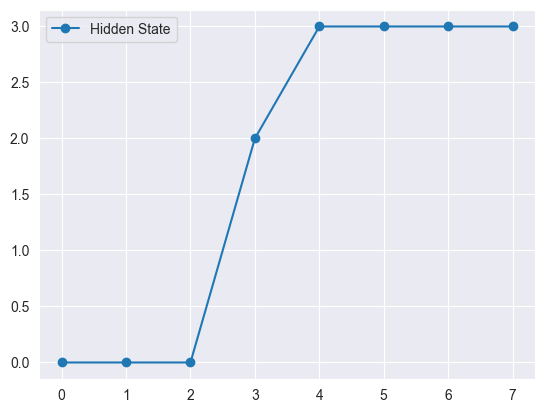

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
  
# Define the state space
states = ["Word0", "Word1", "Word2", "Word3"]
n_states = len(states)
  
# Define the observation space
observations = ["Loud", "Soft"]
n_observations = len(observations)
  
# Define the initial state distribution
start_probability = np.array([0.8, 0.1, 0.1, 0.0])
  
transition_probability = np.array([[0.7, 0.2, 0.1, 0.0],
                                    [0.0, 0.6, 0.4, 0.0],
                                    [0.0, 0.0, 0.6, 0.4],
                                    [0.0, 0.0, 0.0, 1.0]])
  
# Define the observation likelihoods
emission_probability = np.array([[0.7, 0.3],
                                  [0.4, 0.6],
                                  [0.6, 0.4],
                                  [0.3, 0.7]])
  
# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability
  
# Define the sequence of observations
observations_sequence = np.array([0, 0, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)
  
# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)
  
# Plot the results
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.legend()
plt.show()

## The Viterbi algorithm

In [3]:
obs = ("sound1", "sound2", "sound3")
states = ("Word1", "Word2")
start_p = {"Word1": 0.6, "Word2": 0.4}
trans_p = {
    "Word1": {"Word1": 0.7, "Word2": 0.3},
    "Word2": {"Word1": 0.4, "Word2": 0.6},
}
emit_p = {
    "Word1": {"sound1": 0.5, "sound2": 0.4, "sound3": 0.1},
    "Word2": {"sound1": 0.1, "sound2": 0.3, "sound3": 0.6},
}

def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0] [st] = {"prob": start_p[st] * emit_p[st] [obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t - 1] [states[0]] ["prob"] * trans_p[states[0]] [st] * emit_p[st] [obs[t]]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t - 1] [prev_st] ["prob"] * trans_p[prev_st] [st] * emit_p[st] [obs[t]]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st

            max_prob = max_tr_prob
            V[t] [st] = {"prob": max_prob, "prev": prev_st_selected}

    for line in dptable(V):
        print(line)

    opt = []
    max_prob = 0.0
    best_st = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st

    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1] [previous] ["prev"])
        previous = V[t + 1] [previous] ["prev"]

    print ("The steps of states are " + " ".join(opt) + " with highest probability of %s" % max_prob)

def dptable(V):
    # Print a table of steps from dictionary
    yield " " * 5 + "     ".join(("%3d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%lf" % v[state] ["prob"]) for v in V)
        
viterbi(obs,states,start_p,trans_p,emit_p)

       0       1       2
Word1: 0.30000 0.08400 0.00588
Word2: 0.04000 0.02700 0.01512
The steps of states are Word1 Word1 Word2 with highest probability of 0.01512


### Implementation of speech recognition library

In [4]:
from gtts import gTTS
import os
from os import path
from deep_translator import GoogleTranslator
import speech_recognition as sp

class translator_9:
    def __init__(self,language):
        self.language = language

    def get_audio(self):
        mic = sp.Microphone(device_index=0)
        r = sp.Recognizer()
        with mic as source:
            print("Spuneti acum")
            audio = r.listen(source)
        try:
            c = r.recognize_google(audio, language="ro-RO")
        except:
            print("Something go wrong")
        return c
    def translate(self,c):
        translated = GoogleTranslator(source='auto', target=self.language).translate(c)
        print(translated)
        return translated
    def voice(self,trans):
        myobj = gTTS(text=trans, lang=self.language, slow=False)
        myobj.save("welcome.mp3")
        os.system("welcome.mp3")

# possible languages: 'de','en','ro'....
# Translators- LingueeTranslator, GoogleTranslator, MyMemoryTranslator, PonsTranslator.
Ion = translator_9('en')
c = Ion.get_audio()
trans = Ion.translate(c)
Ion.voice(trans)
# Instead of mic(microphone) we can also read from an existing audio file.

Spuneti acum
Health
